# yFiles

This example demonstrates how the NetworkX-Graph created by PT3S can be used with yFiles.

# PT3S Release

In [1]:
#pip install PT3S -U --no-deps

# Imports

In [2]:
import os
import geopandas
from geopandas import GeoSeries
import logging
import pandas as pd
import io

import subprocess

import matplotlib.pyplot as plt

import matplotlib

import folium
from folium.plugins import HeatMap

import networkx as nx

import typing
from yfiles_jupyter_graphs import GraphWidget

try:
    from PT3S import dxAndMxHelperFcts
except:
    import dxAndMxHelperFcts
    
try:
    from PT3S import Mx
except:
    import Mx

try:
    from PT3S import Rm
except:
    import Rm

In [3]:
import importlib

In [4]:
#importlib.reload(dxAndMxHelperFcts)

# Logging

In [5]:
logger = logging.getLogger()  

logFileName= r"Example6.log" 

loglevel = logging.DEBUG
logging.basicConfig(filename=logFileName
                        ,filemode='w'
                        ,level=loglevel
                        ,format="%(asctime)s ; %(name)-60s ; %(levelname)-7s ; %(message)s")    

fileHandler = logging.FileHandler(logFileName)     

logger.addHandler(fileHandler)

consoleHandler = logging.StreamHandler()
consoleHandler.setFormatter(logging.Formatter("%(levelname)-7s ; %(message)s"))
consoleHandler.setLevel(logging.INFO)
logger.addHandler(consoleHandler)

# Read Model and Results

In [6]:
dbFilename="Example6"
dbFile=os.path.join(os.path.dirname(os.path.abspath(dxAndMxHelperFcts.__file__))
                    +'/Examples/'
                    +dbFilename
                    +'.db3'
)

In [7]:
m=dxAndMxHelperFcts.readDxAndMx(dbFile=dbFile,preventPklDump=True,maxRecords=0)
#NBVAL_IGNORE_OUTPUT

INFO    ; Dx.__init__: dbFile (abspath): c:\users\aUserName\3s\pt3s\Examples\Example6.db3 exists readable ...


# Show Network Graph

In [8]:
netNodes=[n for (n,data) in m.G.nodes(data=True) if data['ID_CONT']==data['IDPARENT_CONT']] # nur das Netz

In [9]:
GNet=m.G.subgraph(netNodes)

In [10]:
nx.number_connected_components(GNet)

1

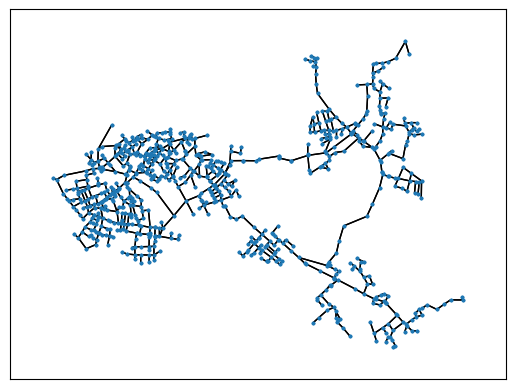

In [11]:
nx.draw_networkx(GNet,with_labels = False,node_size=3,pos=m.nodeposDctNx)

In [12]:
w=GraphWidget(graph=GNet)

In [13]:
w.get_node_coordinate_mapping()

<function yfiles_jupyter_graphs.widget.GraphWidget.default_node_coordinate_mapping(index: int, node: Dict)>

In [14]:
node=w.nodes[0]
node['properties']['GEOMWKB']

b'\x01\x01\x00\x00\x00Z\xff\x90+\x99\xe8\xe7@\xfe<\n\xfd\x12\xe6\xf7@'

In [15]:
def my_node_coordinate_mapping(node: typing.Dict):
    geom=GeoSeries.from_wkb([node['properties']['GEOMWKB']],crs='EPSG:25832').to_crs('EPSG:4326').geometry.iloc[0]
    lon=geom.centroid.x 
    lat=geom.centroid.y   
    return(lat,lon)

In [16]:
my_node_coordinate_mapping(node)

(0.883406837136939, 4.949580885073139)

In [17]:
w.set_node_coordinate_mapping(my_node_coordinate_mapping)

In [18]:
display(w)

GraphWidget(layout=Layout(height='800px', width='100%'))